<a href="https://colab.research.google.com/github/AmruthaSri852/Google-Colab/blob/main/PC-Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 01 - 23rd August 2022

### Object 01

In [ ]:
# !pip install seaborn
# !pip install plotly
# !pip install matplot
# !pip install pandas
# !pip install numpy

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import openpyxl

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Parallel Computer Lab(20103011)/Covid 19 dataset - covid_19_clean_complete.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24366 entries, 0 to 24365
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  7440 non-null   object 
 1   Country/Region  24366 non-null  object 
 2   Lat             24366 non-null  float64
 3   Long            24366 non-null  float64
 4   Date            24366 non-null  object 
 5   Confirmed       24366 non-null  int64  
 6   Deaths          24366 non-null  int64  
 7   Recovered       24366 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 1.5+ MB


In [ ]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0,0


In [ ]:
df.rename(columns={"Province/State":"state","Country/Region":"country"},inplace=True)

In [ ]:
df.head()

,state,country,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0,0


In [ ]:
df['active'] = df['Confirmed'] - df['Deaths'] - df["Recovered"]

In [ ]:
df.tail()

,state,country,Lat,Long,Date,Confirmed,Deaths,Recovered,active
24361,Saint Pierre and Miquelon,France,46.885200,-56.315900,4/23/20,1,0,0,1
24362,NaN,South Sudan,6.877000,31.307000,4/23/20,5,0,0,5
24363,NaN,Western Sahara,24.215500,-12.885800,4/23/20,6,0,5,1
24364,NaN,Sao Tome and Principe,0.186360,6.613081,4/23/20,4,0,0,4
24365,NaN,Yemen,15.552727,48.516388,4/23/20,1,0,0,1


In [ ]:
### Top Countries Data

In [ ]:
df['Date'].max()

'4/9/20'

In [ ]:
top = df[df['Date'] == df['Date'].max()]
top.head()

,state,country,Lat,Long,Date,Confirmed,Deaths,Recovered,active
20436,NaN,Afghanistan,33.0000,65.0000,4/9/20,484,15,32,437
20437,NaN,Albania,41.1533,20.1683,4/9/20,409,23,165,221
20438,NaN,Algeria,28.0339,1.6596,4/9/20,1666,235,347,1084
20439,NaN,Andorra,42.5063,1.5218,4/9/20,583,25,58,500
20440,NaN,Angola,-11.2027,17.8739,4/9/20,19,2,2,15


In [ ]:
world = top.groupby('country')['Confirmed','Recovered','Deaths','active'].sum().reset_index()
world.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,country,Confirmed,Recovered,Deaths,active
0,Afghanistan,484,32,15,437
1,Albania,409,165,23,221
2,Algeria,1666,347,235,1084
3,Andorra,583,58,25,500
4,Angola,19,2,2,15


In [ ]:
len(world)

185

In [ ]:
### Plot on World Map

figure = px.choropleth(world,locations="country",locationmode='country names',color='active',
                       hover_name="country",range_color=[1,1000],color_continuous_scale="agsunset",
                       title = "Country With Active Cases")
figure.show()

In [ ]:
### Plotting Worldwide Confirmed Cases vs Date

In [ ]:
total_confirmed_cases = df.groupby('Date')['Confirmed','Date'].sum().reset_index()
total_confirmed_cases.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Date,Confirmed
0,1/22/20,555
1,1/23/20,654
2,1/24/20,941
3,1/25/20,1434
4,1/26/20,2118


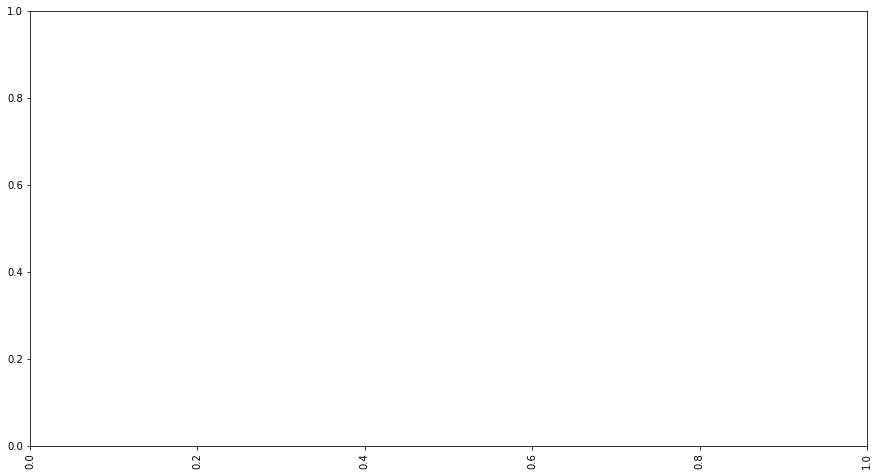

In [ ]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90,fontsize=10)
# sns.pointplot(total_confirmed_cases['Date'].dt.date,total_confirmed_cases['Confirmed'],color='red')
plt.show()

In [ ]:
### Top 20 Countries having most active cases

In [ ]:
df.head()

,state,country,Lat,Long,Date,Confirmed,Deaths,Recovered,active
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0,0,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0,0,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0,0,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0,0,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0,0,0


In [ ]:
top_actives = top.groupby("country")['active'].sum().sort_values(ascending=False).reset_index().head(20)

In [ ]:
top_actives

,country,active
0,US,420826
1,Italy,96877
2,Spain,85610
3,Germany,63167
4,United Kingdom,57520
5,France,51725
6,Turkey,39232
7,Iran,29801
8,Canada,20151
9,Netherlands,19220


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



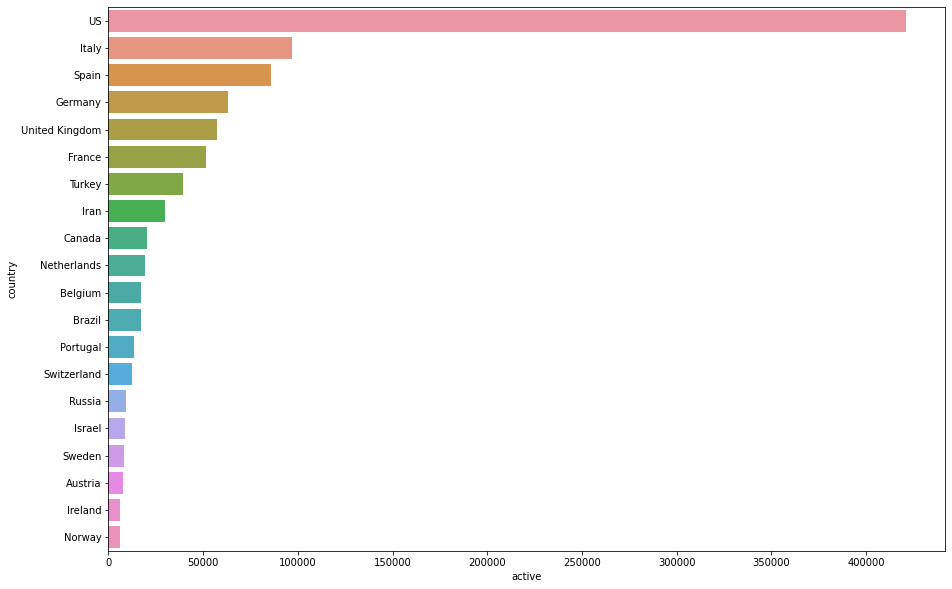

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(top_actives['active'],top_actives['country'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



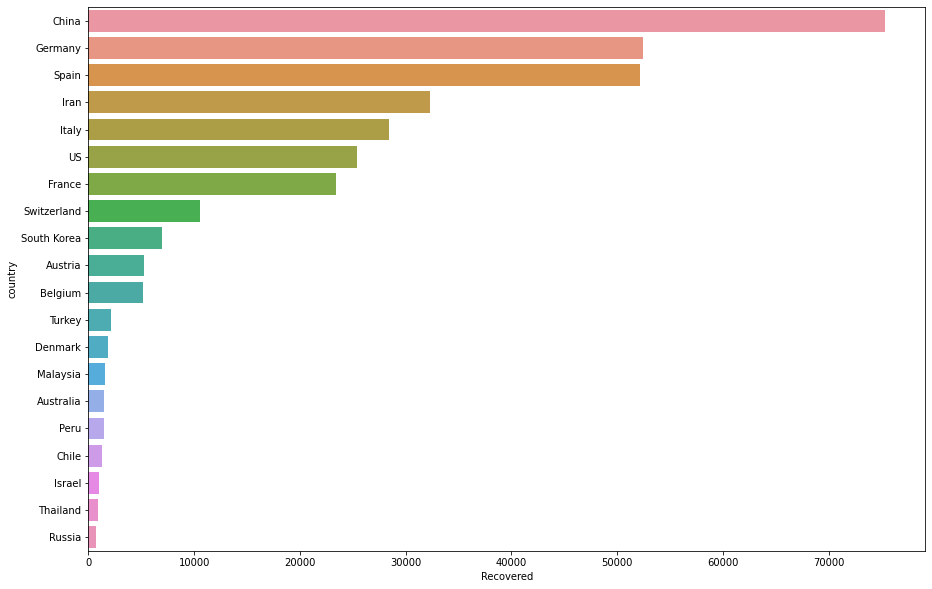

In [ ]:
top_recovered = top.groupby("country")['Recovered'].sum().sort_values(ascending=False).reset_index().head(20)
plt.figure(figsize=(15,10))
sns.barplot(top_recovered['Recovered'],top_recovered['country'])
plt.show()

In [ ]:
# Make DataFrames For Different Countries 

In [ ]:
china = df[df['country']=="China"]
china = china.groupby("Date")['active','Recovered','Confirmed','Deaths'].sum().reset_index()
china.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Date,active,Recovered,Confirmed,Deaths
0,1/22/20,503,28,548,17
1,1/23/20,595,30,643,18
2,1/24/20,859,35,920,26
3,1/25/20,1326,38,1406,42
4,1/26/20,1971,48,2075,56


In [ ]:
us = df[df['country']=="US"]
us = us.groupby("Date")['active','Recovered','Confirmed','Deaths'].sum().reset_index()
us.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Date,active,Recovered,Confirmed,Deaths
0,1/22/20,1,0,1,0
1,1/23/20,1,0,1,0
2,1/24/20,2,0,2,0
3,1/25/20,2,0,2,0
4,1/26/20,5,0,5,0


In [ ]:
india = df[df['country']=="India"]
india = india.groupby("Date")['active','Recovered','Confirmed','Deaths'].sum().reset_index()
india.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Date,active,Recovered,Confirmed,Deaths
0,1/22/20,0,0,0,0
1,1/23/20,0,0,0,0
2,1/24/20,0,0,0,0
3,1/25/20,0,0,0,0
4,1/26/20,0,0,0,0


In [ ]:
italy = df[df['country']=="Italy"]
italy = italy.groupby("Date")['active','Recovered','Confirmed','Deaths'].sum().reset_index()
italy.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Date,active,Recovered,Confirmed,Deaths
0,1/22/20,0,0,0,0
1,1/23/20,0,0,0,0
2,1/24/20,0,0,0,0
3,1/25/20,0,0,0,0
4,1/26/20,0,0,0,0


In [ ]:
# plotting data (Confirmed cases vs time)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning

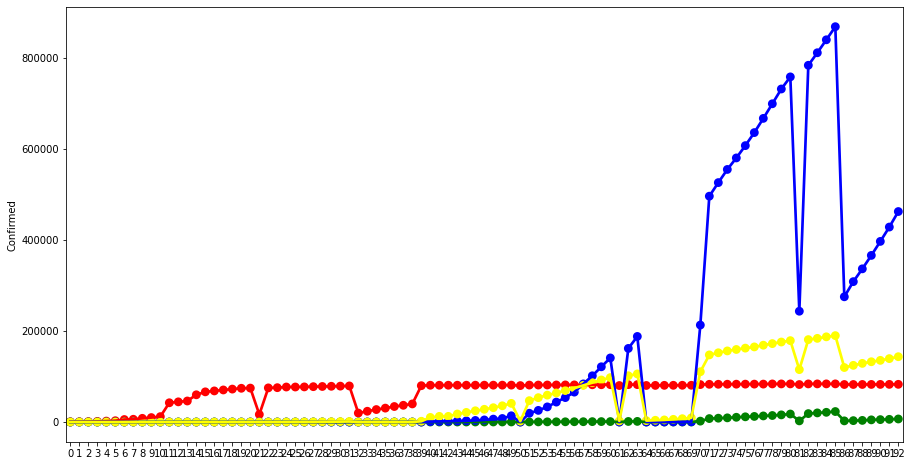

In [ ]:
plt.figure(figsize=(15,8))
sns.pointplot(china.index,china['Confirmed'],color="red")
sns.pointplot(india.index,india['Confirmed'],color="green")
sns.pointplot(us.index,us['Confirmed'],color="blue")
sns.pointplot(italy.index,italy['Confirmed'],color="yellow")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning

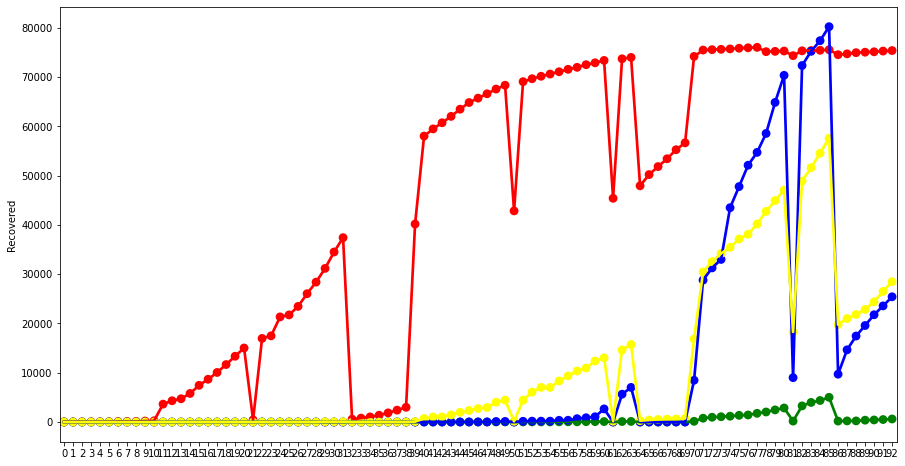

In [ ]:
plt.figure(figsize=(15,8))
sns.pointplot(china.index,china['Recovered'],color="red")
sns.pointplot(india.index,india['Recovered'],color="green")
sns.pointplot(us.index,us['Recovered'],color="blue")
sns.pointplot(italy.index,italy['Recovered'],color="yellow")
plt.show()

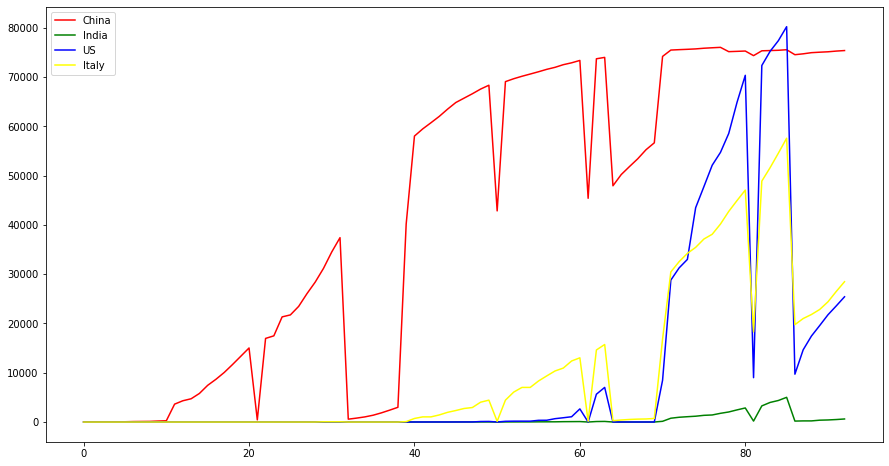

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(china.index,china['Recovered'],color="red",label="China")
plt.plot(india.index,india['Recovered'],color="green",label="India")
plt.plot(us.index,us['Recovered'],color="blue",label="US")
plt.plot(italy.index,italy['Recovered'],color="yellow",label="Italy")
plt.legend(loc=2)
plt.show()

In [ ]:
### Prediction and Forecasting

In [ ]:
# from fbprophet import Prophet

ModuleNotFoundError: ignored

In [ ]:
df.head()

,state,country,Lat,Long,Date,Confirmed,Deaths,Recovered,active
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0,0,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0,0,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0,0,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0,0,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0,0,0


In [ ]:
### Forecasting for Confirmed Cases
confirmed = df.groupby('Date')['Confirmed'].sum().reset_index()
confirmed.head()

,Date,Confirmed
0,1/22/20,555
1,1/23/20,654
2,1/24/20,941
3,1/25/20,1434
4,1/26/20,2118


In [ ]:
confirmed.columns = ['ds','y']
confirmed.head()

,ds,y
0,1/22/20,555
1,1/23/20,654
2,1/24/20,941
3,1/25/20,1434
4,1/26/20,2118


In [ ]:
## Create Model
#m = Prophet(interval_width=0.95)

In [ ]:
# Train Model
#m.fit(confirmed)

In [ ]:
#future = m.make_future_dataframe(periods=7)
#future.tail(7)

In [ ]:
#forecast = m.predict(future)

In [ ]:
#forecast.tail(7)

In [ ]:
#forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(7)

In [ ]:
#confirmed_plot = m.plot(forecast)

In [ ]:
#confirmed_weekly_plt = m.plot_components(forecast)

In [ ]:
## For India

#df_india = df[df['country']=='India']
#df_india.head()

In [ ]:
#df_india = df.query('country=="India"')
#df_india.head()

In [ ]:
#df_india_date = df_india.query('Date<="2020-03-30"')

In [ ]:
#df_india_date.tail()

### Object 02 - Assignment 

###### What's pandas?

**Question 01 :- What is pandas?**

**ANS :-**Pandas is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series.

###### What's TPU?

**Question :- What is TPU?**

**ANS :-** Tensor Processing Unit (TPU) is an AI accelerator application-specific integrated circuit (ASIC) developed by Google specifically for neural network machine learning, particularly using Google's own TensorFlow software

###### All dataypes in Python.


**Question :- Explain all datatype in python.**

**ANS :-**

*1 - Python Numbers*

Integers, floating point numbers and complex numbers fall under Python numbers category. They are defined as int, float and complex classes in Python.

*2- Python List*

List is an ordered sequence of items. It is one of the most used datatype in Python and is very flexible. All the items in a list do not need to be of the same type.

*3- Python Tuple* 

Tuple is an ordered sequence of items same as a list. The only difference is that tuples are immutable. Tuples once created cannot be modified.

*3- Python Strings*

String is sequence of Unicode characters. We can use single quotes or double quotes to represent strings. Multi-line strings can be denoted using triple quotes, ''' or """.

*4- Python Set*

Set is an unordered collection of unique items. Set is defined by values separated by comma inside braces { }. Items in a set are not ordered.

###### What's numpy and tensorflow py?

**Question:-** what is numpy and tensorflow py?

**Answer:-** 

NUMPY:- NumPy is the fundamental package for scientific computing in Python. It is a Python library that provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much more.

Tensorflow:- 
It is an open source artificial intelligence library, using data flow graphs to build models. It allows developers to create large-scale neural networks with many layers. TensorFlow is mainly used for: Classification, Perception, Understanding, Discovering, Prediction and Creation.


###### What kind of libraries to be used in python for multiprocessing program?

Multiprocessing is a package that supports spawning processes using an API similar to the threading module. The multiprocessing package offers both local and remote concurrency, effectively side-stepping the Global Interpreter Lock by using subprocesses instead of threads.

Libraries are

- Ray

- MPIRE

- Dask

- ProcessPoolExecutor

- multiprocessing.Pool

- Joblib

# Lab 02 - 30th August 2022

### Object 03

#### Write a program to reveals the Hardware and Software configurations on which program is being run. 

In [ ]:
import multiprocessing as mp
print("Number of processors: ", mp.cpu_count())

Number of processors:  2


In [ ]:
import platform
 
my_system = platform.uname()
 
print(f"System: {my_system.system}")
print(f"Node Name: {my_system.node}")
print(f"Release: {my_system.release}")
print(f"Version: {my_system.version}")
print(f"Machine: {my_system.machine}")
print(f"Processor: {my_system.processor}")

System: Linux
Node Name: 24da2b36263a
Release: 5.4.188+
Version: #1 SMP Sun Apr 24 10:03:06 PDT 2022
Machine: x86_64
Processor: x86_64


### listing Local Devices

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 5226520734131368108
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14415560704
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 17888689140101960248
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

### Listing GPU

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()
from tensorflow.python.client import device_lib

def get_available_gpus():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos if x.device_type == 'GPU']

get_available_gpus()

['/device:GPU:0']

In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


### GPU utilization

In [ ]:
!pip install GPUtil

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for GPUtil: filename=GPUtil-1.4.0-py3-none-any.whl size=7411 sha256=96862308cdd583f869a91e6b14188bdfb95d133e83d035979c6548a127d90c8a
  Stored in directory: /root/.cache/pip/wheels/6e/f8/83/534c52482d6da64622ddbf72cd93c35d2ef2881b78fd08ff0c
Successfully built GPUtil


In [ ]:
import GPUtil
GPUtil.showUtilization()
GPUs = GPUtil.getGPUs()

| ID | GPU | MEM |
------------------
|  0 |  0% |  2% |


### For Memory information

In [ ]:
!cat /proc/meminfo

MemTotal:       13298580 kB
MemFree:         8067088 kB
MemAvailable:   11241992 kB
Buffers:          140860 kB
Cached:          2870680 kB
SwapCached:            0 kB
Active:          2257304 kB
Inactive:        2588688 kB
Active(anon):    1474852 kB
Inactive(anon):    10704 kB
Active(file):     782452 kB
Inactive(file):  2577984 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               652 kB
Writeback:             0 kB
AnonPages:       1834432 kB
Mapped:           779124 kB
Shmem:             11460 kB
KReclaimable:     111836 kB
Slab:             172392 kB
SReclaimable:     111836 kB
SUnreclaim:        60556 kB
KernelStack:        6496 kB
PageTables:        19724 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6649288 kB
Committed_AS:    4798356 kB
VmallocTotal:   34359738367 kB
VmallocUsed:       52736 kB
VmallocChunk:          0 kB
Percpu:          

### CPU Time

In [ ]:
import time as t
start_time = t.time()
print("--- CPU TIME =%s seconds ---" % (t.time() - start_time))

--- CPU TIME =8.344650268554688e-05 seconds ---


### Array Sum

### Sequential Execution

In [ ]:
import time 
from timeit import default_timer as timer 
import multiprocessing as mp
import numpy as np
x = [1, 2, 3, 4] # Write input
start=timer()
y = 0 # Initialize output

for i in range(len(x)):
  y += x[i] # Add each element to the output variable

print(y) # Print output
end1=timer()-start
print("sequential time : ",end1)

10
sequential time :  0.00024359899998671608


### Execution By Chunks 

In [ ]:
import time 
from timeit import default_timer as timer 
import multiprocessing as mp
import numpy as np
x = [1, 2, 4, 4]
start=timer()
chunk1 = x[:2]
chunk2 = x[2:]

sum_1 = sum(chunk1)
sum_2 = sum(chunk2)

result = sum_1 + sum_2

print(result)
end1=timer()-start
print("time : ",end1)

11
time :  0.00022229299975151662


### Object 04

##### Explain the pool and process module with differences.




**Pool class:**    
* When we have junk of data, we can use Pool class.
* Only the process under execution are kept in the memory.
* I/O operation: It waits till the I/O operation is completed & does not schedule another process. This might increase the execution time.

**Process class:**    
* When we have a small data or functions and less repetitive tasks to do,we can use Process class.
* It puts all the process in the memory. Hence in the larger task, it might cause to loss of memory.
* I/O operation: The process class suspends the process executing I/O operations and schedule another process parallel.

### Object 05 - Assignment 

### Assignment 

- Whats matplotlib in python?

- Whats the difference between the class and module?

- What are the joint class and start class?

- What's a speed up?

- What's Sleep function in python?

- Write a sequencial and parallel(multiprocessing) program to estimate the queue of the numbers in the list. And also compares their execution time taken by using speed up and their line graph 




